# PRAKTIKUM K-Nearest Neighbors (KNN)

1. Import Library

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

2. Konek ke Gdrive

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Import Dataset

In [19]:
df_train = pd.read_excel('/content/drive/MyDrive/Praktikum_ML/Praktikum10/data/kelulusan_train.xls')
df_test = pd.read_excel('/content/drive/MyDrive/Praktikum_ML/Praktikum10/data/kelulusan_test.xls')

3. Load dataset

*  Menampilkan data awal pada dataset



In [20]:
df_train.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [21]:
df_test.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


*  Mengecek stuktur dataset

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


4. Data Cleaning

*  Memeriksa nilai unik pada kolom kategorikal

In [24]:
print(df_train['JENIS KELAMIN'].unique())
print(df_train['STATUS MAHASISWA'].unique())
print(df_train['STATUS NIKAH'].unique())
print(df_train['STATUS KELULUSAN'].unique())

['PEREMPUAN' 'LAKI - LAKI']
['BEKERJA' 'MAHASISWA']
['BELUM MENIKAH' 'MENIKAH']
['TERLAMBAT' 'TEPAT']


*  Menghapus kolom yang tidak digunakan

In [25]:
df_train.drop(columns=['STATUS NIKAH'], inplace=True)
df_test.drop(columns=['STATUS NIKAH'], inplace=True)

*  Mengubah nilai kategorikal menjadi numerik

In [26]:
replacements = {
    'JENIS KELAMIN': {'LAKI - LAKI': 0, 'PEREMPUAN': 1},
    'STATUS MAHASISWA': {'MAHASISWA': 0, 'BEKERJA': 1},
    'STATUS KELULUSAN': {'TERLAMBAT': 1, 'TEPAT': 0}
}

df_train = df_train.replace(replacements, inplace=False)
df_train.head()

/tmp/ipython-input-492111145.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replacements, inplace=False)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,1,1,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,1
1,DWI HESTYNA PRIHASTANTY,1,0,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,1
2,MURYA ARIEF BASUKI,1,1,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,1
3,NANIK SUSANTI,1,0,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,1
4,RIFKA ISTIQFARINA,1,1,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,1


*  Melakukan encoding pada dataset test

In [27]:
df_test = df_test.replace(replacements, inplace=False)
df_test.head()

/tmp/ipython-input-1812349956.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace(replacements, inplace=False)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,0,0,24,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,0
1,LEYLA TRIYANA PRATIWI,1,0,26,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,0
2,VERIS SOFIYAN PRAYOGA,0,0,29,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,0
3,ADITYA AKBAR NUGRAHA,0,0,27,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,0
4,ERNA EKA RIYANTI,1,0,25,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,0


* Cek missing value

In [28]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [29]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


* Menangani missing value

In [30]:
df_train = df_train.dropna(subset=['IPS 8'])
df_train = df_train.dropna(subset=['IPK '])

In [31]:
df_test = df_test.dropna(subset=['IPS 8'])
df_test = df_test.dropna(subset=['IPK '])

*  Mengecek kembali missing value

In [32]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [33]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


*  Menghapus kolom yang tidak digunakan dalam analisis

In [34]:
df_train = df_train.drop(columns=['NAMA'])
df_train.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,1,1,28,2.76,2.8,3.2,3.17,2.98,3.0,3.03,0.0,3.07,1


In [35]:
df_test= df_test.drop(columns=['NAMA'])
df_test.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,0,24,3.17,2.7,3.23,2.41,3.0,2.47,1.75,0.0,2.75,0


5. Analisis korelasi fitur

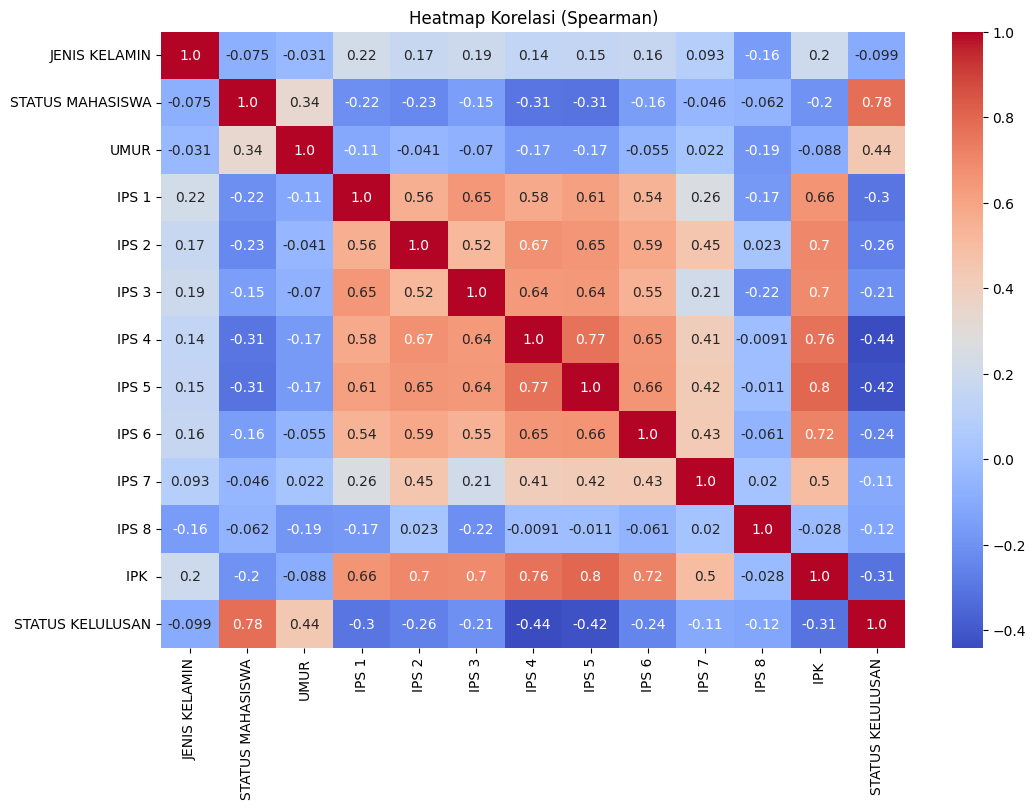

In [36]:
# Menghitung matriks korelasi menggunakan Spearman
correlation_matrix = df_train.corr(method='spearman')

# Menampilkan matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2', cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi (Spearman)')
plt.show()

6. Visualisasi distribusi status kelulusan

/tmp/ipython-input-4138968205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2')


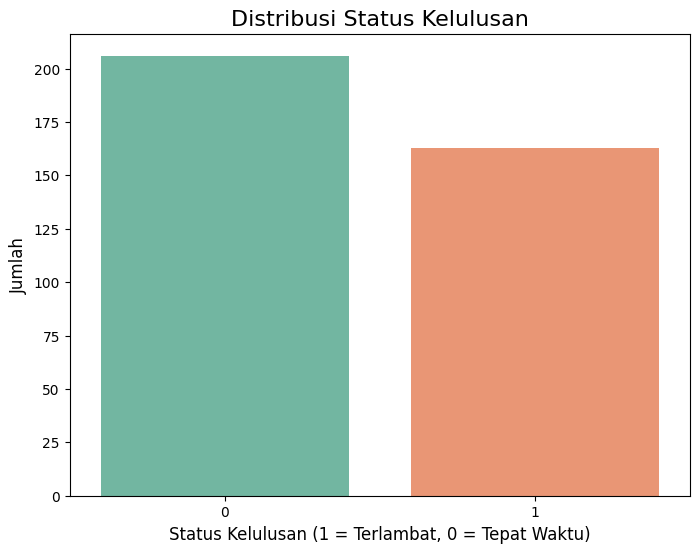

In [37]:
# Membuat diagram batang untuk status kelulusan
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2')

# Menambahkan judul dan label
plt.title('Distribusi Status Kelulusan', fontsize=16)
plt.xlabel('Status Kelulusan (1 = Terlambat, 0 = Tepat Waktu)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.show()

7. Pemisahan data dan normalisasi

In [38]:
# Data yang dilatih
x_train = df_train.drop(columns=['STATUS KELULUSAN'])
y_train = df_train['STATUS KELULUSAN']

# Data validasi
x_test = df_test.drop(columns=['STATUS KELULUSAN'])
y_test = df_test['STATUS KELULUSAN']

# Normalisasi features after spliting
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

8. Menangani ketidakseimbangan kelas dengan SMOTE

In [39]:
print('Before SMOTE:')
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print('After SMOTE:')
print(y_train_smote.value_counts())

Before SMOTE:
STATUS KELULUSAN
0    206
1    163
Name: count, dtype: int64
After SMOTE:
STATUS KELULUSAN
1    206
0    206
Name: count, dtype: int64


9. Menemtukan parameter terbaik (hyperparameter tuning)

In [40]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] # Corrected 'matric' to 'metric'
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("Best Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)

Best Params: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Score (CV): 0.9029973552747576


10. Melatih Model KNN terbaik dan melakukan prediks

In [41]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

# prediksi
y_pred = best_knn.predict(x_test_scaled)

11. Evalusai model dengan classification report

In [42]:
print("\Classification Report:")
print(classification_report(y_test, y_pred))

\Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00         2

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-805313760.py:1: SyntaxWarning: invalid escape sequence '\C'
  print("\Classification Report:")


12. Evaluasi dengan confusion matriks

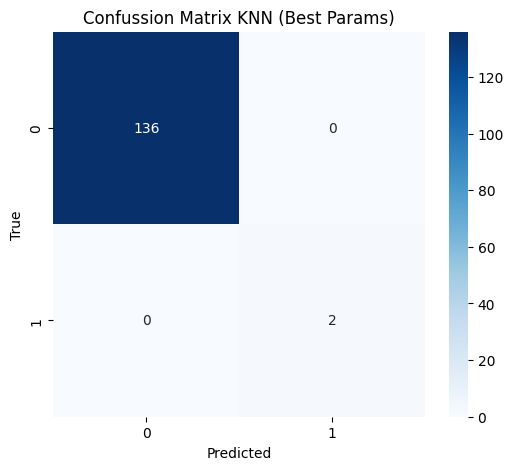

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confussion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

13. Validasi model dengan cross validation

In [44]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.9029973552747576
Std Dev: 0.042371318661662674


14. Menentukan Nilai K Optimal dengan Elbow Method

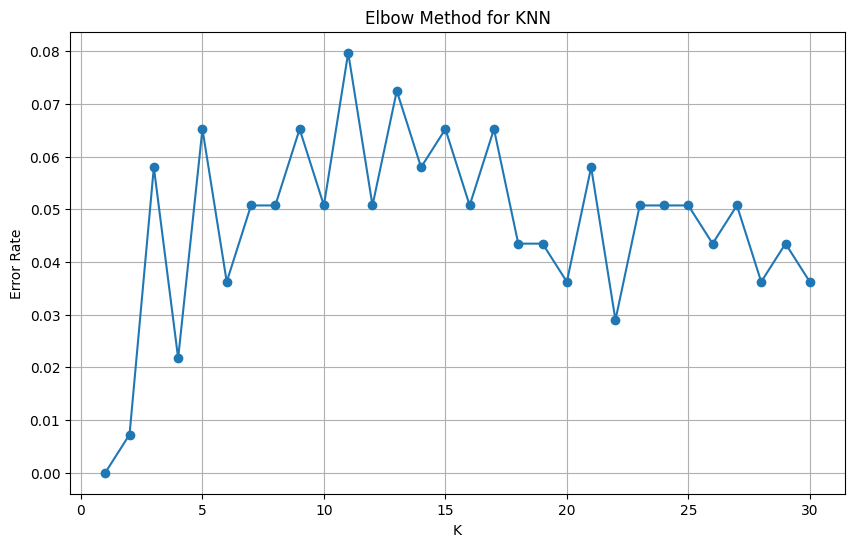

In [45]:
errors = []

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train_smote, y_train_smote)
    pred = knn_temp.predict(x_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()

# PRAKTIKUM MANDIRI

## LATIHAN 1

1. Import Library

In [46]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

2. Membuat DataFrame dari Data Training

In [47]:
data = {
    'temperatur': [10, 25, 15, 20, 18, 20, 22, 24],
    'angin': [0, 0, 5, 3, 7, 10, 5, 6],
    'persepsi': ['Dingin','Panas','Dingin','Panas','Dingin','Dingin','Panas','Panas']
}

df = pd.DataFrame(data)
df

,temperatur,angin,persepsi
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin
5,20,10,Dingin
6,22,5,Panas
7,24,6,Panas


3. Memisahkan antara Fitur dan Label

In [48]:
X = df[['temperatur', 'angin']]
y = df['persepsi']

4. Memilih nilai K

In [49]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)

5. Melatih Model menggunakan seluruh Data

In [50]:
model.fit(X, y)

KNeighborsClassifier()

6. Data test dari soal

In [51]:
data_test = [[16, 3]]
prediksi = model.predict(data_test)
prediksi

# Menampilkan hasilnya
print("Nilai k yang dipakai:", k)
print("Persepsi Marry =", prediksi[0])

Nilai k yang dipakai: 5
Persepsi Marry = Dingin


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Latihan 2

1. Import library

In [52]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

2. Membuat DataFrame dari Data Training

In [53]:
data = {
    'nim': ['TI001','TI002','TI003','TI004','TI005','TI006','TI007','TI008','TI009','TI010'],
    'actual': ['Lulus','Lulus','Lulus','Lulus','Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus'],
    'predicted': ['Lulus','Lulus','Lulus','Tidak Lulus','Tidak Lulus','Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus','Tidak Lulus']
}

df = pd.DataFrame(data)
df

,nim,actual,predicted
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus
5,TI006,Tidak Lulus,Lulus
6,TI007,Tidak Lulus,Tidak Lulus
7,TI008,Tidak Lulus,Tidak Lulus
8,TI009,Tidak Lulus,Tidak Lulus
9,TI010,Tidak Lulus,Tidak Lulus


3. Hitung Confusion Matrix

In [54]:
cm = confusion_matrix(df['actual'], df['predicted'], labels=['Lulus', 'Tidak Lulus'])
cm

array([[3, 2],
       [1, 4]])

4. Menampilkan confusion matrix dalam bentuk table

In [55]:
cm_df = pd.DataFrame(
    cm,
    index=['Actual Lulus', 'Actual Tidak Lulus'],
    columns=['Pred Lulus', 'Pred Tidak Lulus']
)
cm_df

,Pred Lulus,Pred Tidak Lulus
Actual Lulus,3,2
Actual Tidak Lulus,1,4


5. Hitung Accuracy, Precision, dan Recall

In [56]:
accuracy = accuracy_score(df['actual'], df['predicted'])
precision = precision_score(df['actual'], df['predicted'], pos_label='Lulus')
recall = recall_score(df['actual'], df['predicted'], pos_label='Lulus')

accuracy, precision, recall

(0.7, 0.75, 0.6)

6. Tampilkan hasil secara rapi

In [57]:
print("Confusion Matrix:")
print(cm_df)
print("\nAccuracy  :", round(accuracy*100, 2), "%")
print("Precision :", round(precision*100, 2), "%")
print("Recall    :", round(recall*100, 2), "%")

Confusion Matrix:
                    Pred Lulus  Pred Tidak Lulus
Actual Lulus                 3                 2
Actual Tidak Lulus           1                 4

Accuracy  : 70.0 %
Precision : 75.0 %
Recall    : 60.0 %


## LATIHAN 3

1. Import library

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

2. Membaca dataset

In [59]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum10/data/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


3. Encoding fitur kategorik

In [61]:
le = LabelEncoder()

df['Cloud Cover'] = le.fit_transform(df['Cloud Cover'])
df['Season'] = le.fit_transform(df['Season'])
df['Location'] = le.fit_transform(df['Location'])
df['Weather Type'] = le.fit_transform(df['Weather Type'])
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


4. Memisahka antara fitur dan target

In [62]:
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

5. Split data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

6. Tentukan nilai K

In [64]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)

7. Melatih model

In [65]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

8. Prediksi data tst

In [66]:
y_pred = model.predict(X_test)

9. Hitung akurasi

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 2), "%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 88.41 %

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       651
           1       0.85      0.88      0.87       647
           2       0.95      0.94      0.95       701
           3       0.90      0.85      0.87       641

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.89      0.88      0.88      2640



10. Tampilkan data test

In [68]:
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred

test_results

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Actual,Predicted
4111,23.0,38,4.5,6.0,0,1021.19,9,0,10.0,1,3,3
10607,62.0,94,14.5,83.0,0,1025.57,10,2,4.0,1,3,3
7372,40.0,51,2.0,12.0,3,1025.15,8,1,8.0,2,3,3
11786,-7.0,79,6.5,90.0,2,993.56,0,3,1.5,1,2,2
12227,21.0,94,10.0,109.0,3,1027.71,11,1,9.0,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2543,33.0,63,6.0,59.0,3,1017.11,0,2,5.0,0,1,1
96,23.0,88,11.5,65.0,2,1000.74,1,3,5.0,2,1,1
2474,-4.0,94,4.0,93.0,2,999.99,0,3,2.0,2,2,2
2522,-3.0,98,8.0,89.0,3,996.59,1,3,1.5,2,2,2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email "ariakristallnacht@gmail.com"
!git config --global user.name "Aria Kristallincht"

!git clone https://github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git
%cd   TI03_AriaKS_0110222076

!cp -r /content/drive/MyDrive/Praktikum_ML/Praktikum10/ ./Praktikum10

!ls -lah

!git add .
!git commit -m "praktikum 10 ml"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")

os.system(f'git remote set-url origin https://{token}@github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git')

!git push origin main